####Handling the categorical values####

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('housing.csv')

In [4]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
###Since there are multiple columns , so taking few values for comparison

In [6]:
df=pd.read_csv("housing.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [7]:
#now here the three are of categorical variable type and the SalePrice is a comtinious variable type

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
#now let's see the unique values in each of them

In [10]:
df.columns


Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [12]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [15]:
for column in df.columns:
    length = len(df[column].unique())
    print(length)

5
6
7
663


In [16]:
#so the column 1 has --> 5 categories
#              2         6 categories
#              3         7 categories

In [17]:
df.isnull()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,False,True,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1455,False,False,False,False
1456,False,False,False,False
1457,False,False,False,False
1458,False,True,False,False


In [18]:
#checking the null values
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [19]:
#1st and 3rd col are having only few values missing so replacing them with most frequent category 

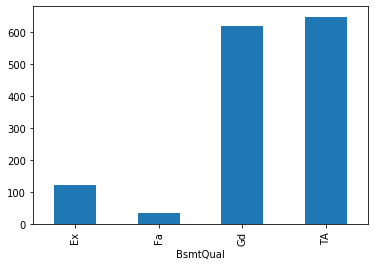

In [25]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

In [26]:
#TA is coming max no of times

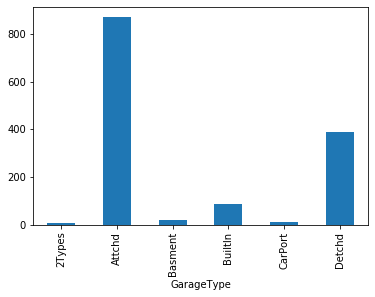

In [27]:
df.groupby(['GarageType'])['GarageType'].count().plot.bar()

In [28]:
#here attchd is at it's maximum

In [30]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [31]:
#creating a function

In [32]:
def myfunc(df,variable):
    #getting the most frequent category
    mfc=df[variable].value_counts().index[0]
    #replacing nan with most frequently occuring values
    df[variable].fillna(mfc,inplace=True)

In [33]:
for columnname in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    myfunc(df,columnname)

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [36]:
#so now we have replaced all the null values